# L'incidence de la varicelle

In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

In [33]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

data_file = "varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)
    
raw_data = pd.read_csv(data_file, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202312          7  10252     7063   13441      15          10   
1     202311          7   4919     2880    6958       7           4   
2     202310          7   4854     2731    6977       7           4   
3     202309          7   7004     4548    9460      11           7   
4     202308          7   8175     5316   11034      12           8   
5     202307          7   6595     3782    9408      10           6   
6     202306          7   9595     6017   13173      14           9   
7     202305          7   6237     3907    8567       9           5   
8     202304          7   6299     3973    8625       9           6   
9     202303          7   6063     3798    8328       9           6   
10    202302          7   6576     3060   10092      10           5   
11    202301          7   8153     5470   10836      12           8   
12    202252          7   5171     2717    7625       8           4   
13    202251          7   6226     3822    8630       9           5   
14    202250          7   6590     3100   10080      10           5   
15    202249          7   5095     3212    6978       8           5   
16    202248          7   4985     3043    6927       8           5   
17    202247          7   6087     3733    8441       9           5   
18    202246          7   3033     1392    4674       5           3   
19    202245          7   3827     1720    5934       6           3   
20    202244          7   4271     2231    6311       6           3   
21    202243          7   5863     3302    8424       9           5   
22    202242          7   3770     1950    5590       6           3   
23    202241          7   4177     2219    6135       6           3   
24    202240          7   4883     1472    8294       7           2   
25    202239          7   2041      331    3751       3           0   
26    202238          7   1771      419    3123       3           1   
27    202237          7   1725      499    2951       3           1   
28    202236          7   1069      178    1960       2           1   
29    202235          7   1581      400    2762       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1656  199126          7  17608    11304   23912      31          20   
1657  199125          7  16169    10700   21638      28          18   
1658  199124          7  16171    10071   22271      28          17   
1659  199123          7  11947     7671   16223      21          13   
1660  199122          7  15452     9953   20951      27          17   
1661  199121          7  14903     8975   20831      26          16   
1662  199120          7  19053    12742   25364      34          23   
1663  199119          7  16739    11246   22232      29          19   
1664  199118          7  21385    13882   28888      38          25   
1665  199117          7  13462     8877   18047      24          16   
1666  199116          7  14857    10068   19646      26          18   
1667  199115          7  13975     9781   18169      25          18   
1668  199114          7  12265     7684   16846      22          14   
1669  199113          7   9567     6041   13093      17          11   
1670  199112          7  10864     7331   14397      19          13   
1671  199111          7  15574    11184   19964      27          19   
1672  199110          7  16643    11372   21914      29          20   
1673  199109          7  13741     8780   18702      24          15   
1674  199108          7  13289     8813   17765      23          15   
1675  199107          7  12337     8077   16597      22          15   
1676  199106          7  10877     7013   14741      19          12   
1677  199105          7  10442     6544   14340      18          11   
1678  199104          7   7913     4563   11263      14           8   
1679  199103          7  15387    10484   20290      27          18   
1680  199102          7  16277  

On vérifie s'il y a une ligne nulle.

In [34]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Pas de problème, à part la première ligne de titres. Il n'est donc pas nécessaire de supprimer les données manquantes.

In [35]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [36]:
sorted_data = data.set_index('period').sort_index()
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2022-08-29/2022-09-04  202235          7   1581      400    2762       2   
2022-09-05/2022-09-11  202236          7   1069      178    1960       2   
2022-09-12/2022-09-18  202237          7   1725      499    2951       3   
2022-09-19/2022-09-25  202238          7   1771      419    3123       3   
2022-09-26/2022-10-02  202239          7   2041      331    3751       3   
2022-10-03/2022-10-09  202240          7   4883     1472    8294       7   
2022-10-10/2022-10-16  202241          7   4177     2219    6135       6   
2022-10-17/2022-10-23  202242          7   3770     1950    5590       6   
2022-10-24/2022-10-30  202243          7   5863     3302    8424       9   
2022-10-31/2022-11-06  202244          7   4271     2231    6311       6   
2022-11-07/2022-11-13  202245          7   3827     1720    5934       6   
2022-11-14/2022-11-20  202246          7   3033     1392    4674       5   
2022-11-21/2022-11-27  202247          7   6087     3733    8441       9   
2022-11-28/2022-12-04  202248          7   4985     3043    6927       8   
2022-12-05/2022-12-11  202249          7   5095     3212    6978       8   
2022-12-12/2022-12-18  202250          7   6590     3100   10080      10   
2022-12-19/2022-12-25  202251          7   6226     3822    8630       9   
2022-12-26/2023-01-01  202252          7   5171     2717    7625       8   
2023-01-02/2023-01-08  202301          7   8153     5470   10836      12   
2023-01-09/2023-01-15  202302          7   6576     3060   10092      10 

In [37]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Aucun problème.

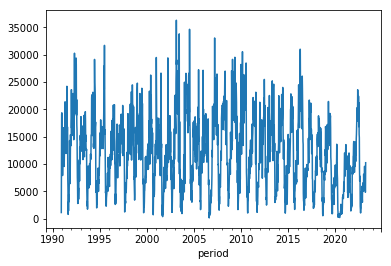

In [38]:
sorted_data['inc'].plot()

On doit nécessairement changer la ligne ci-dessous, car on s'intéresse a 1er septembre, et que y part de 1991, non plus de 1985.

In [39]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [41]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2        # message d'erreur si la condition n'est pas satisfaite
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

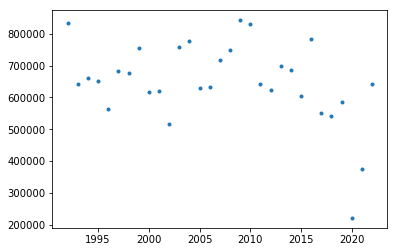

In [43]:
yearly_incidence = pd.Series(index=year, data=yearly_incidence)
yearly_incidence.plot(style='.')

On cherche les épidémies les plus fortes et les plus faibles.

In [47]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64